### 주제: 문장 유형 분류 AI 경진대회 - 전체 타겟
---
- 출처: https://dacon.io/competitions/official/236037/overview/description

In [3]:
# 모듈 로딩
import pandas as pd
import platform
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import random # random seed 설정용

[1] 데이터 준비

In [10]:
# 데이터 로딩
df = pd.read_csv('./open/train.csv').iloc[:,1:]
df

,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [5]:
# 결측치 체크
df.isnull().sum()

문장       0
유형       0
극성       0
시제       0
확실성      0
label    0
dtype: int64

In [8]:
# 중복 데이터 체크
df.duplicated().sum()

31

In [11]:
# 중복 데이터 삭제
df = df.drop_duplicates(keep='last')

In [12]:
df

,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


[2] 데이터/타겟 분리

In [33]:
data = df['문장']
target = df['label']
target1 = df['유형']
target2 = df['극성']
target3 = df['시제']
target4 = df['확실성']

[3] 데이터 처리

In [34]:
# 형태소 분리 객체
okt = Okt()

In [35]:
# 형태소 분리 후 태깅하는 함수
def makeTagging(data):
    result_list = []
    for title in data:
        result = []
        for word in okt.pos(title, stem=True): # 어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: # 'Noun'-명사, 'Verb'-동사, 'Adjective'-형용사 
                if(len(word[0])>1): # 한 글자 단어들 빼줌
                    result.append(word[0])
        result_list.append(result)
    return result_list

In [36]:
result_list = makeTagging(data)

In [37]:
# 데이터 확인
for i in range(5):
    print(result_list[i])

['포인트', '금리', '인상', '이후', '처음']
['이다', '전문가', '단위', '상황', '평가', '하다', '예정', '라며', '이전', '방역', '지표', '기준', '충족', '하다', '진자', '격리', '의무', '조정', '여부', '검토', '하다', '하다']
['정부', '고유', '대응', '위해', '연말', '유류', '인하', '확대']
['서울시', '올해', '즉시', '견인', '유예', '시간', '제공', '하다', '밝히다', '하루', '차도', '자전거', '도로', '예외', '하다', '입장', '바꾸다', '하다']
['익사', '자다', '사다리', '태우다', '거꾸로', '놓다', '소금', '막다', '가득', '채우다']


In [38]:
# 분리한 단어들로 문장 다시 생성하는 함수
def makeData(data):
    total_list = []
    for stc in data:
        sentence = ''
        for word in stc:
            sentence=sentence+' '+word
        total_list.append(sentence.strip())
    return total_list

In [39]:
total_data = makeData(result_list)

In [40]:
data = total_data

In [41]:
# 데이터 확인
for i in range(5):
    print(data[i])

포인트 금리 인상 이후 처음
이다 전문가 단위 상황 평가 하다 예정 라며 이전 방역 지표 기준 충족 하다 진자 격리 의무 조정 여부 검토 하다 하다
정부 고유 대응 위해 연말 유류 인하 확대
서울시 올해 즉시 견인 유예 시간 제공 하다 밝히다 하루 차도 자전거 도로 예외 하다 입장 바꾸다 하다
익사 자다 사다리 태우다 거꾸로 놓다 소금 막다 가득 채우다


In [89]:
new_target = pd.get_dummies(target)

In [90]:
new_target.shape

(16510, 64)

In [93]:
# 비율에 맞게 학습/테스트 데이터 분활
X_train, X_test, y_train, y_test = train_test_split(np.array(data), 
                                                    new_target, 
                                                    test_size=0.2,
                                                    random_state=42)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=42)

In [95]:
X_train.shape, X_test.shape, X_val.shape

((10566,), (3302,), (2642,))

[4] 단어사전 생성

[4-1] 단어사전 생성 및 사용할 단어사전 수 설정

In [55]:
# 단어사전 생성하는 함수
def makeVoca(numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(X_train)   
    return myToken

In [56]:
# 텍스트 데이터 토큰화 진행
myToken=makeVoca()
print('word index: {}'.format(len(myToken.word_index)))

word index: 18061


In [61]:
num_words = 6000
word_counts = dict(myToken.word_counts.items())
counts = list(word_counts.values())

print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

전체 토큰 수 : 18061
전체 토큰 빈도 수 : 151581
6000 위까지 등장 토큰 빈도수 : 122845
비율 : 81.04247893865326


In [62]:
myToken=makeVoca(num_words)
print('word index: {}'.format(len(myToken.word_index)))

word index: 18061


[4-2] 텍스트 => 정수 수치화 (생성한 단어사전 기반)

In [63]:
seq_train=myToken.texts_to_sequences(X_train)
seq_test=myToken.texts_to_sequences(X_test)
seq_val=myToken.texts_to_sequences(X_val)

In [64]:
# 패딩 길이 설정 
def checkLength(datas):
    length = []
    for data in datas:
        length.append(len(data))
    plt.hist(length)
    plt.xlabel('length')
    plt.show()
    return length

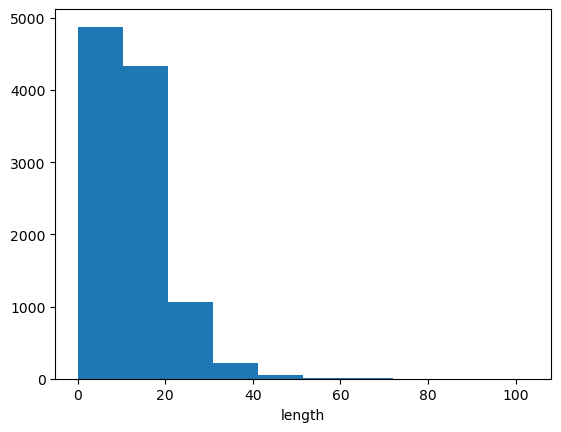

In [65]:
length=checkLength(seq_train)

In [72]:
pad_length = 40

In [73]:
train_seq = pad_sequences(seq_train, maxlen=pad_length)
test_seq = pad_sequences(seq_test, maxlen=pad_length)
val_seq = pad_sequences(seq_val, maxlen=pad_length)

In [74]:
train_seq.shape, test_seq.shape, val_seq.shape

((10566, 40), (3302, 40), (2642, 40))

[5] 모델 구성

방법 1. 심플RNN

---

In [104]:
model = Sequential()
model.add(Embedding(num_words, 32, input_length=pad_length))
model.add(Dropout(0.3))
model.add(SimpleRNN(64))
model.add(Dropout(0.3))
model.add(Dense(64, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 32)            192000    
                                                                 
 dropout_10 (Dropout)        (None, 40, 32)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
Total params: 202,368
Trainable params: 202,368
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [110]:
hist = model.fit(train_seq, y_train, 
                epochs=5, 
                batch_size=32, 
                validation_data=(val_seq, y_val))

Epoch 1/5
331/331 [==============================] - 7s 14ms/step - loss: 1.9437 - accuracy: 0.4756 - val_loss: 1.7179 - val_accuracy: 0.5356
Epoch 2/5
331/331 [==============================] - 5s 14ms/step - loss: 1.6892 - accuracy: 0.5649 - val_loss: 1.6219 - val_accuracy: 0.5723
Epoch 3/5
331/331 [==============================] - 5s 14ms/step - loss: 1.5488 - accuracy: 0.5965 - val_loss: 1.5864 - val_accuracy: 0.5761
Epoch 4/5
331/331 [==============================] - 5s 14ms/step - loss: 1.3930 - accuracy: 0.6362 - val_loss: 1.6900 - val_accuracy: 0.5598
Epoch 5/5
331/331 [==============================] - 5s 15ms/step - loss: 1.2558 - accuracy: 0.6713 - val_loss: 1.6688 - val_accuracy: 0.5594


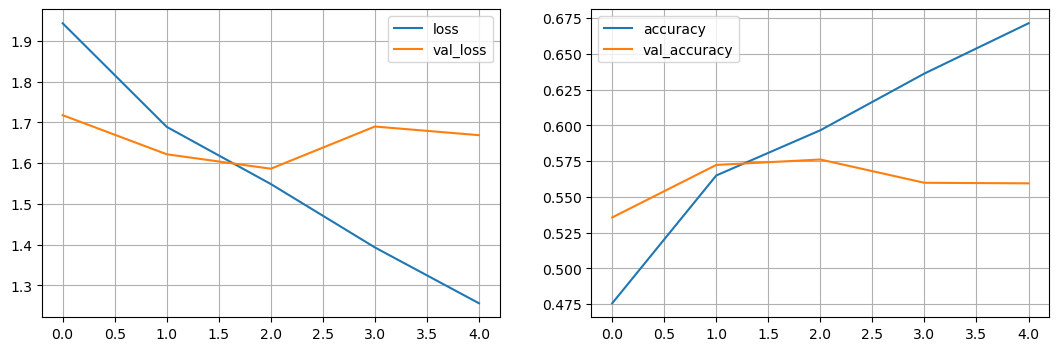

In [111]:
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.subplot(122)
plt.plot(hist.epoch, hist.history['accuracy'])
plt.plot(hist.epoch, hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [117]:
model.evaluate(test_seq, y_test)

104/104 [==============================] - 1s 6ms/step - loss: 1.6927 - accuracy: 0.5530


[1.692729115486145, 0.5529981851577759]

방법 2. 양방향 LSTM

---

In [121]:
model2 = Sequential()
model2.add(Embedding(num_words, 32, input_length=pad_length))
model2.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(units=64)))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='softmax'))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 32)            192000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 40, 128)          49664     
 nal)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 40, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [124]:
model2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [125]:
hist2 = model2.fit(train_seq, y_train, 
                epochs=5, 
                batch_size=64, 
                validation_data=(val_seq, y_val))

Epoch 1/5
166/166 [==============================] - 35s 137ms/step - loss: 1.9517 - accuracy: 0.4618 - val_loss: 1.7301 - val_accuracy: 0.5469
Epoch 2/5
166/166 [==============================] - 22s 135ms/step - loss: 1.7013 - accuracy: 0.5682 - val_loss: 1.7366 - val_accuracy: 0.5484
Epoch 3/5
166/166 [==============================] - 21s 129ms/step - loss: 1.5734 - accuracy: 0.5981 - val_loss: 1.6089 - val_accuracy: 0.5674
Epoch 4/5
166/166 [==============================] - 23s 139ms/step - loss: 1.4389 - accuracy: 0.6156 - val_loss: 1.6659 - val_accuracy: 0.5659
Epoch 5/5
166/166 [==============================] - 22s 135ms/step - loss: 1.3466 - accuracy: 0.6350 - val_loss: 1.6611 - val_accuracy: 0.5606


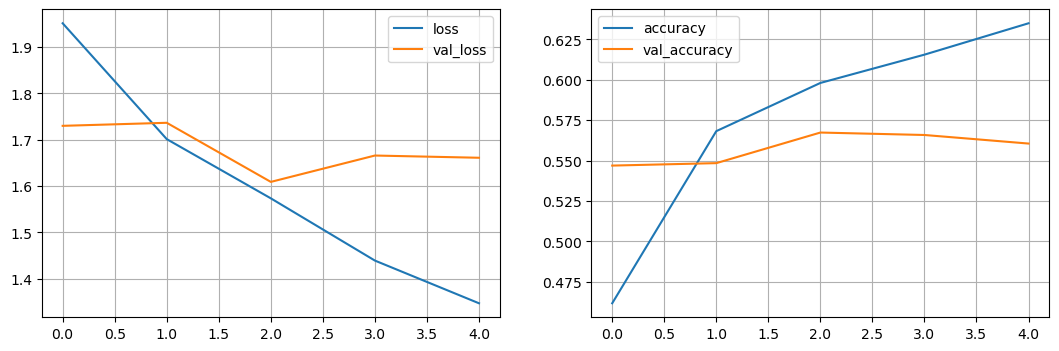

In [126]:
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(hist2.epoch, hist2.history['loss'])
plt.plot(hist2.epoch, hist2.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.subplot(122)
plt.plot(hist2.epoch, hist2.history['accuracy'])
plt.plot(hist2.epoch, hist2.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [127]:
model2.evaluate(test_seq, y_test)

104/104 [==============================] - 3s 26ms/step - loss: 1.7155 - accuracy: 0.5448


[1.7155466079711914, 0.5448213219642639]

- 데이콘 test.csv로 예측

In [161]:
test = pd.read_csv('./open/test.csv')['문장']
sub = pd.read_csv('./open/sample_submission.csv')

In [141]:
test_list = makeTagging(test)

In [143]:
# 분리한 단어들로 문장 다시 생성하는 함수
def makeData(data):
    total_list = []
    for stc in data:
        sentence = ''
        for word in stc:
            sentence=sentence+' '+word
        total_list.append(sentence.strip())
    return total_list

In [144]:
total_test = makeData(test_list)

In [145]:
test_data = total_test

In [147]:
# 데이터 확인
for i in range(5):
    print(test_data[i])

장욱진 가족 허물 없다 가족 처음 공개 되다 정약용 정효 자전 정부 인전 강진 사람 주의 부탁 받다 일찍 죽다 아들 홀로 남다 며느리 안타깝다 사연 쓸다 서예 작품
조지 부시 버락 오바마 대통령 전쟁 위험 때문 버리다 카드
지난해 영업 이익 올해 급증 하다
수상 작가 맺다 계약서 내용 가운데 일부 독소 조항 해석 돼다 수정 요청 받다 문학 사상사 수용 하다 않다 우수상 뽑히다 후보 올해 수상 작품집 작품 수록 거부 하다
최근 산업 은행 대규모 손실 위기 닥치다 에어부산 금융 지원 결정 하다 에어부산 부채 비율 지난해 급등 하다


In [148]:
seq_title=myToken.texts_to_sequences(test_data)

In [149]:
title_seq = pad_sequences(seq_title, maxlen=pad_length)

In [151]:
t = []
for i in range(len(title_seq)):
    t.append(model.predict([title_seq[[i]]]))

1/1 [==============================] - 0s 30ms/step


In [153]:
topic = []
for i in range(len(t)):
    topic.append(np.argmax(t[i]))

In [177]:
label = []
for i in topic:
    label.append(new_target.columns[i])

In [178]:
sub['label'] = label

In [179]:
sub.to_csv('제출용.csv', index=False)